In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [44]:
athletes = pd.read_csv('athlete_events.csv')
athletes.shape

(271116, 15)

In [45]:
noc = pd.read_csv('noc_regions.csv')
noc.shape

(230, 3)

In [46]:
noc.drop(['notes'], axis=1, inplace=True)

In [47]:
athleteNOC = athletes.merge(noc, left_on='NOC', right_on='NOC', how='left')

In [48]:
athleteNOC.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [49]:
print(athleteNOC.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64


In [50]:
athleteNOC = athleteNOC[athleteNOC['Age'].notna()]
athleteNOC = athleteNOC[athleteNOC['region'].notna()]
athleteNOC = athleteNOC[athleteNOC['Weight'].notna()]
athleteNOC = athleteNOC[athleteNOC['Height'].notna()]
athleteNOC['Medal'].fillna('DNW', inplace = True)

In [51]:
print(athleteNOC.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64


In [52]:
athletes.shape

(271116, 15)

In [53]:
#if athlete won medals then exceed 1, if not tehn exceeds 0
athleteNOC['Medal_Won'] = np.where(athleteNOC.loc[:,'Medal'] == 'DNW', 0, 1)
athleteNOC['Age'] = athleteNOC['Age'].astype(int)



In [ ]:
athleteNOC.to_csv('athlete_physical_attributes.csv', sep=',')

In [54]:
events = pd.pivot_table(athleteNOC,  index = ['region', 'Year'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

#events = events.loc[events['Gold'] > 0, :]

region = events['region'].unique()

year = events['Year'].unique()



In [55]:
year

array([1960, 1964, 1968, 1972, 1980, 2004, 2008, 2012, 2016, 1992, 1996,
       2000, 2006, 2010, 2014, 1984, 1988, 1994, 1976, 1998, 2002, 1924,
       1928, 1932, 1936, 1948, 1952, 1956, 1900, 1906, 1908, 1912, 1920,
       1904, 1896])

In [56]:
events.head()

Medal,region,Year,Bronze,Gold,Silver
0,Afghanistan,1960,0,0,0
1,Afghanistan,1964,0,0,0
2,Afghanistan,1968,0,0,0
3,Afghanistan,1972,0,0,0
4,Afghanistan,1980,0,0,0


In [57]:
events.shape

(3044, 5)

In [58]:
Gold_total = events.groupby(['Year','region'])['Gold'].agg('sum').reset_index()

Gold_total_pivot = pd.pivot_table(Gold_total,
                     index = 'region',
                     columns = 'Year',
                     values = 'Gold',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

Gold_total_pivot.loc[:,'All']

region
USA        2115
Russia     1465
Germany    1102
Canada      362
Name: All, dtype: int64

In [59]:
medal_total = athleteNOC.groupby(['Year','region'])['Medal_Won'].agg('sum').reset_index()

medal_total_pivot = pd.pivot_table(medal_total,
                     index = 'region',
                     columns = 'Year',
                     values = 'Medal_Won',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

medal_total_pivot.loc[:,'All']

region
USA          4383
Russia       3610
Germany      3189
Australia    1210
Name: All, dtype: int64

Text(0.5, 1.0, 'Total Gold that Countries Won in years')

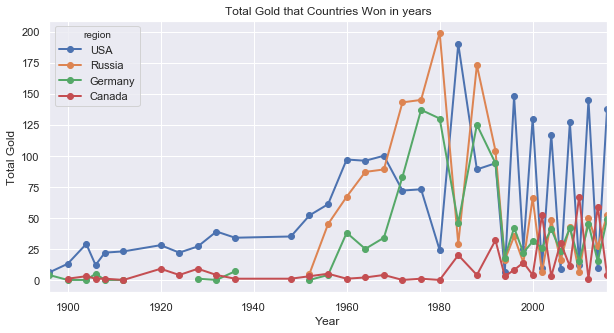

In [60]:
top_countries_won_Gold = ['USA', 'Russia', 'Germany', 'Canada']

year_team_medals = pd.pivot_table(Gold_total, index = 'Year',columns = 'region',values = 'Gold',aggfunc = 'sum')[top_countries_won_Gold]

# plotting the medal tallies
year_team_medals.plot(linestyle = '-',  marker = 'o',figsize = (10,5), linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Total Gold')
plt.title('Total Gold that Countries Won in years')

In [61]:
corr = athleteNOC.corr()

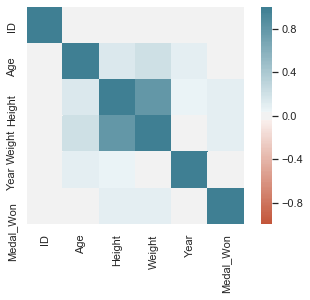

In [62]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [63]:
events = pd.pivot_table(athleteNOC,  index = ['Sex','Age'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

#events = events.loc[events['Gold'] > 0, :]



In [64]:
events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)

In [65]:
event_gold = events.loc[(events['Gold'] > 10), :]
event_gold.head()

Medal,Sex,Age,Bronze,Gold,Silver,Grade
3,F,14,15,19,15,102
4,F,15,41,57,50,312
5,F,16,74,93,85,523
6,F,17,91,113,86,602
7,F,18,117,138,143,817


/Users/guyihan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


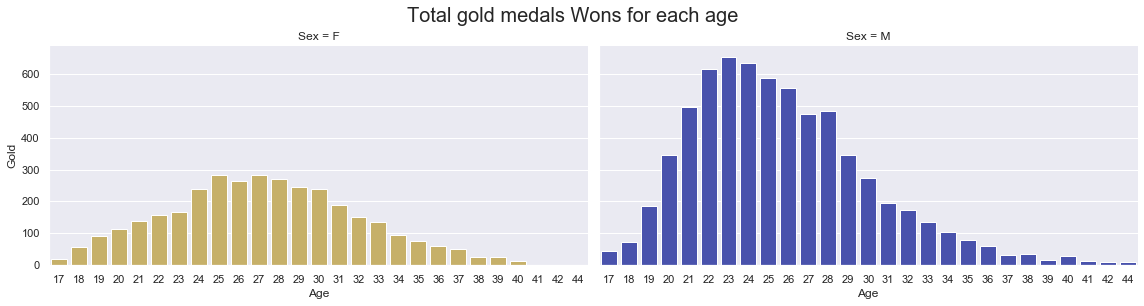

In [66]:

# Create an array with the colors you want to use
colors = ["#d5b85a","#3944bc"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(event_gold, col="Sex",hue="Sex",height=4,aspect=2)
g.map(sns.barplot,"Age", "Gold")
plt.suptitle('Total gold medals Wons for each age', size=20, y=1.05);      

In [67]:
athleteNOC.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_Won
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,0
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0


In [68]:
medal_mean = athleteNOC.groupby(['Year','Sex','Age'])['Medal_Won'].agg('mean').reset_index()

In [69]:
medal_mean.head()

,Year,Sex,Age,Medal_Won
0,1896,M,20,1.000000
1,1896,M,21,0.454545
2,1896,M,23,0.333333
3,1896,M,24,0.333333
4,1896,M,26,0.333333


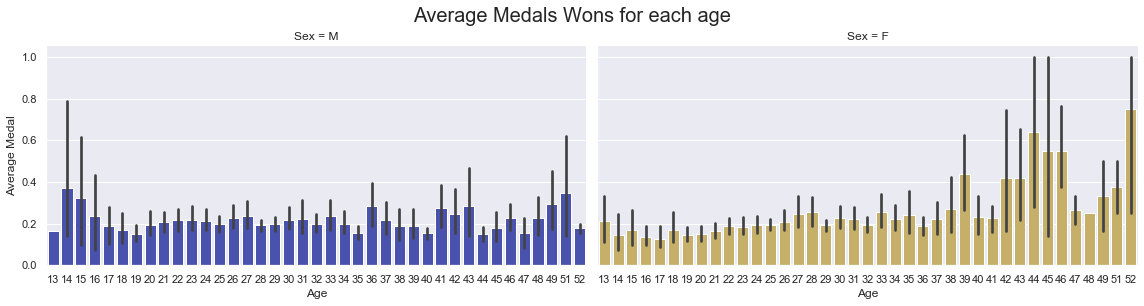

In [70]:
medal_mean = medal_mean.loc[(medal_mean['Medal_Won'] > 0 ), :]
colors = ["#3944bc","#d5b85a"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(medal_mean, col="Sex",hue="Sex",height=4,aspect=2)
g.map(sns.barplot,"Age", "Medal_Won")
g.set_axis_labels('Age', 'Average Medal')

plt.suptitle('Average Medals Wons for each age', size=20, y=1.05);      



In [71]:
athleteNOC_medal = athleteNOC.loc[(athleteNOC['Medal_Won'] > 0 )]

In [72]:
Ave_age = athleteNOC_medal[['Sport','Age','Sex']]
Ave_age.head()

,Sport,Age,Sex
40,Ice Hockey,28,M
41,Gymnastics,28,M
42,Gymnastics,28,M
44,Gymnastics,28,M
48,Gymnastics,28,M


In [73]:
Ave_age = Ave_age.groupby(['Sport','Sex'])['Age'].agg('mean').reset_index()

Ave_age.head()


,Sport,Sex,Age
0,Alpine Skiing,F,23.383333
1,Alpine Skiing,M,25.672414
2,Archery,F,24.280000
3,Archery,M,25.273585
4,Art Competitions,M,32.000000


Text(0.5, 1, 'Average Age of Female that Won Medals for each Sports')

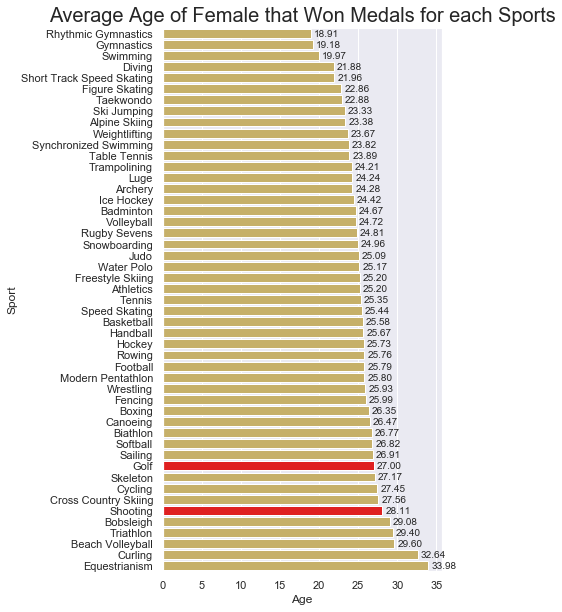

In [74]:
Ave_age_female = Ave_age.loc[(Ave_age['Sex'] == 'F' )]
Ave_age_female = Ave_age_female.sort_values(['Age']).reset_index(drop=True)

custom = {}
for q in set(Ave_age_female.Sport):
    if (q == 'Golf') or (q == 'Shooting') :
        custom[q] = 'red'
    else:
        custom[q] = '#d5b85a'

fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax= sns.barplot(x = "Age", y = "Sport", ax=ax, data=Ave_age_female,palette=custom)
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
ax.set_title('Average Age of Female that Won Medals for each Sports', size=20, y=1)






Text(0.5, 1, 'Male Average Age that Won Medals for each Sports')

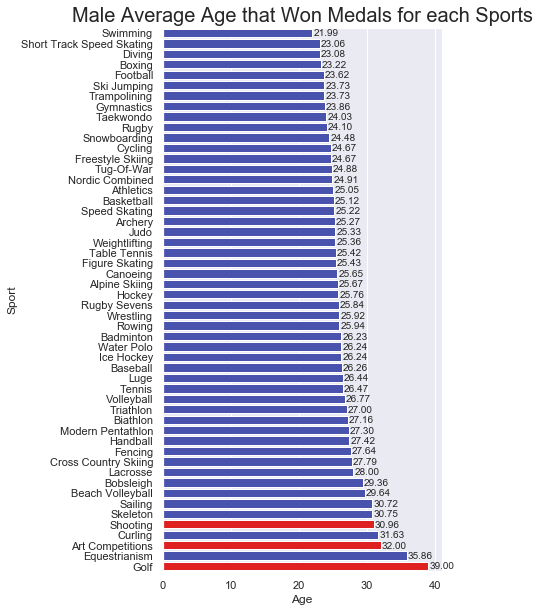

In [75]:
Ave_age_male = Ave_age.loc[(Ave_age['Sex'] == 'M' )]
Ave_age_male = Ave_age_male.sort_values(['Age']).reset_index(drop=True)

custom_palette = {}
for q in set(Ave_age_male.Sport):
    if (q == 'Golf') or (q == 'Shooting') or (q == 'Art Competitions'):
        custom_palette[q] = 'red'
    else:
        custom_palette[q] = '#3944bc'


fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax= sns.barplot(x = "Age", y = "Sport", ax=ax, data=Ave_age_male, palette=custom_palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

ax.set_title('Male Average Age that Won Medals for each Sports', size=20, y=1)

In [76]:
events = pd.pivot_table(athleteNOC,  index = ['Sport'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()
events.head()


Medal,Sport,Bronze,Gold,Silver
0,Alpine Skiing,113,121,120
1,Archery,71,64,71
2,Art Competitions,1,1,0
3,Athletics,1161,1292,1195
4,Badminton,55,48,51


Text(0.5, 1, 'Top Sports won Medels')

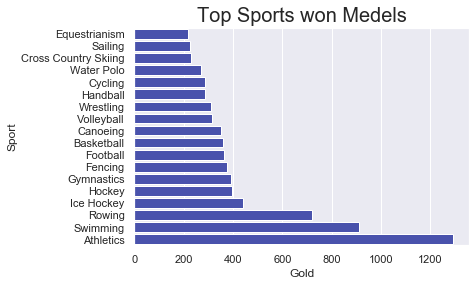

In [77]:
events = events.loc[(events['Gold'] > 200 ), :]
events = events.sort_values(['Gold']).reset_index(drop=True)

g1 =sns.barplot(x='Gold',y='Sport',data=events,color="#3944bc")
g1.set_title("Top Sports won Medels", size=20, y=1)


In [78]:
athleteNOC_Sw = athleteNOC.loc[(athleteNOC['Sport'] == 'Swimming' )]
athleteNOC_Sw = athleteNOC_Sw.loc[(athleteNOC['Medal_Won'] > 0 )]

In [79]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    plt.legend(legends)

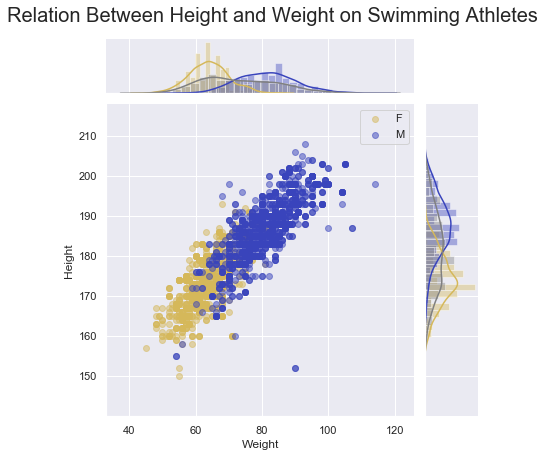

In [80]:

df =athleteNOC_Sw
colors = ["#d5b85a","#3944bc"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
multivariateGrid('Weight', 'Height', 'Sex', df=df)
plt.suptitle('Relation Between Height and Weight on Swimming Athletes', size=20, y=1.05);      


